### 1.Data Understanding

In [1]:
#import necessary libraries
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
from pandas.core.groupby.grouper import get_grouper
import pandas as pd
import seaborn as sns

In [2]:
#load data and print the first 7
df = pd.read_csv("USA-population-Analysis/adult.csv")
df.head(7)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [3]:
#summary statistics
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
#number of rows and columns
df.shape

(32561, 15)

In [5]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#display columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
#data types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

### 2.Data Preprocessing

#### Label Encoding using Scikit-learn
Label encoding is the simplest way to convert categorical values into numerical values. It is a simple process of assigning a numerical value to each category for easy visualization of the data

In [8]:
#check the levels of education using value counts
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

use label enconder function to assign integers to unique categorical values

In [9]:
#define and fit encoder
label_enc = preprocessing.LabelEncoder()
label_enc.fit(df['education'])

#create a new column to hold to transformed labels
df['new_education'] = label_enc.transform(df['education'])
#preview the result
display(df[["education", "new_education"]])

,education,new_education
0,HS-grad,11
1,HS-grad,11
2,Some-college,15
3,7th-8th,5
4,Some-college,15
...,...,...
32556,Some-college,15
32557,Assoc-acdm,7
32558,HS-grad,11
32559,HS-grad,11


In [10]:
#check new labels
df['new_education'].value_counts()

11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: new_education, dtype: int64

In [11]:
#using onehotEncoder in genrating dummy variables
education_one_hot = pd.get_dummies(df['education'], prefix='education')
education_one_hot.head()

,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Sklearn.preprocessing.LabelBinarizer()

In [12]:
label_bin = preprocessing.LabelBinarizer()
label_bin.fit(df["education"])

education_onehot_binar = pd.DataFrame(label_bin.transform(df["education"]), columns=label_bin.classes_)
education_onehot_binar.head(4)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### Sklearn.preprocessing.OneHotEncoder()

In [13]:
#define and fit one hot 
ohe = OneHotEncoder()
ohe.fit(df[['education']])

# transform the data
education_one_hot_sklearn = pd.DataFrame(ohe.transform(df[["education"]]).toarray(), columns=ohe.categories_[0])
education_one_hot_sklearn.head(3)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The problem with one-hot encoding is that it can lead to large and sparse datasets with high dimensionality
* How can we reduce dimensionality to save memory?

When doing this, it is important to try to minimize the loss of information as much as possible. This can be achieved by carefully selecting which features to retain or remove, by using techniques such as feature selection or dimensionality reduction to identify and remove redundant or irrelevant features.
* Feature Hashing                        
* Principal Component Analysis (PCA)

Feature hashing is primarily a dimensionality reduction technique and is often used in Natural Language Processing. However, hashing can also be useful when we want to vectorize categorical features with several hundred and thousand unique categories. With hashing, we can limit the increase of dimensionality by assigning several unique values to the same hash value.
 

In [14]:
#group by education and hash it
education_feature = df.groupby(by=["education"]).count().reset_index()["education"].to_frame()

# Apply the hash function, here MurmurHash3 
def hash_function(row):
    return(sklearn.utils.murmurhash3_32(row.education))

education_feature["education_hash"] = education_feature.apply(hash_function, axis=1)
education_feature

,education,education_hash
0,10th,611946777
1,11th,1907886797
2,12th,960033297
3,1st-4th,-918906142
4,5th-6th,211780192
5,7th-8th,-1858991020
6,9th,1219543683
7,Assoc-acdm,-1621657589
8,Assoc-voc,334383773
9,Bachelors,-1182795914


##### Step 2: Next, we reduce the dimensionality by applying a mod function to the feature values. Using the mod function, we calculate the remainder after dividing the hash value by n_features (the number of features of the output vector).

It is advisable to use a power of two as the n_features parameter; otherwise, the features will not map evenly to the columns.

In [15]:
n_features = 8

def mod_function(row):
    return(abs(row.education_hash) % n_features)

education_feature["education_hash_mod"] = education_feature.apply(mod_function, axis=1)
education_feature.head()

,education,education_hash,education_hash_mod
0,10th,611946777,1
1,11th,1907886797,5
2,12th,960033297,1
3,1st-4th,-918906142,6
4,5th-6th,211780192,0


# Feature Hashing using Scikit-learn
    sklearn.feature_extraction.text.HashingVectorizer

In [16]:
# define Feature Hashing Vectorizer
vectorizer = HashingVectorizer(n_features=8, norm=None, alternate_sign=False, ngram_range=(1,1), binary=True)

# fit the hashing vectorizer and transform the education column
X = vectorizer.fit_transform(education_feature["education"])

# transformed and raw column to data frame
df = pd.DataFrame(X.toarray()).assign(education = education_feature["education"])
display(df)

,0,1,2,3,4,5,6,7,education
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10th
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11th
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12th
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1st-4th
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5th-6th
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7th-8th
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9th
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Assoc-acdm
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Assoc-voc
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bachelors


### Categorizing Data Using bins
Since we are reducing the number of unique values in the data set, it can help to:
             
prevent overfitting                                                            
increase the robustness of the model and mitigate the influence of anomalies                   
reduce the model complexity and the required resources to train the model                        
Systematic binning can help the algorithm to detect underlying patterns more easily and efficiently. It is especially helpful if we can already form a hypothesis before we are defining the bins.

young — 28 and younger                   
middle-aged — 29 to 59                                 
old-aged — 60 and older

In [18]:
df.head()

,0,1,2,3,4,5,6,7,education
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10th
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11th
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12th
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1st-4th
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5th-6th


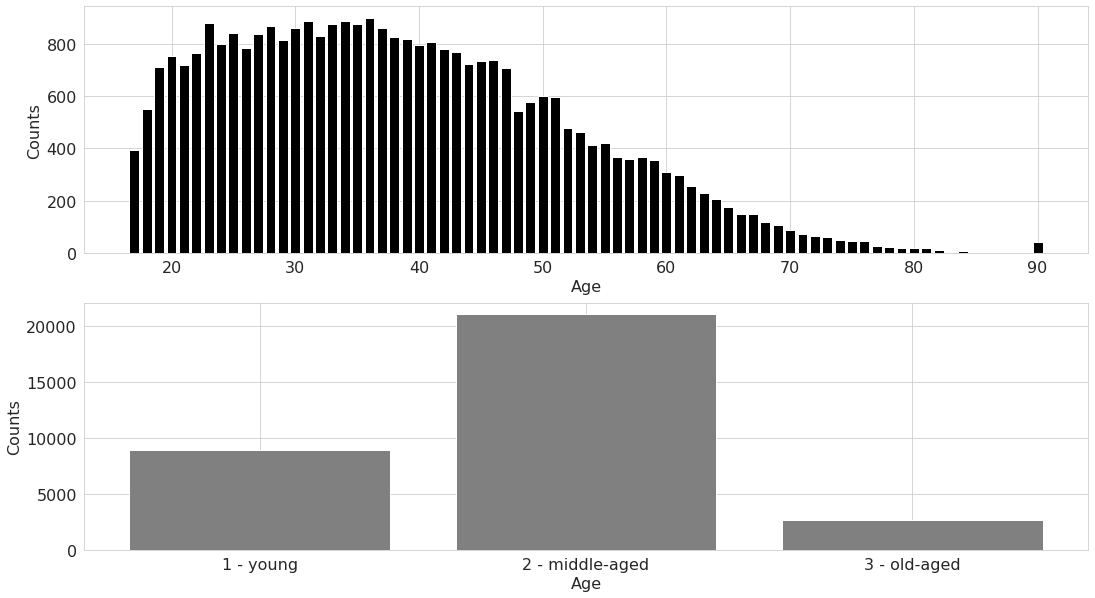

In [19]:
#load data
df = pd.read_csv("USA-population-Analysis/adult.csv")


# creating a dictionary
sns.set_style("whitegrid")
plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=16) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

# define figure
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(18, 10)

# plot age histogram
age_count = df.groupby(by=["age"])["age"].count()
ax1.bar(age_count.index, age_count, color='black')
ax1.set_ylabel("Counts")
ax1.set_xlabel("Age")

# binning age
def age_bins(age):
    if age < 29:
        return "1 - young"
    if age < 60 and age >= 29:
        return "2 - middle-aged"
    else:
        return "3 - old-aged"

# apply trans. function
df["age_bins"] = df["age"].apply(age_bins)

# group and count all entries in the same bin
age_bins_df = df.groupby(by=["age_bins"])["age_bins"].count()

ax2.bar(age_bins_df.index, age_bins_df, color='grey')
ax2.set_ylabel("Counts")
ax2.set_xlabel("Age");

# Log Transform
Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. What are the benefits of log transform:
                                                            
1. It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
2. In most of the cases the magnitude order of the data changes within the range of the data. For instance, the difference between ages 15 and 20 is not equal to the ages 65 and 70. In terms of years, yes, they are identical, but for all other aspects, 5 years of difference in young ages mean a higher magnitude difference. This type of data comes from a multiplicative process and log transform normalizes the magnitude differences like that.
3. It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.

       A critical note: The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transform it. Thus, you ensure the output of the transformation to be positive.

        Log(x+1)

In [20]:
#Log Transform Example
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['log+1'] = (data['value']+1).transform(np.log)
#Negative Values Handling
#Note that the values are different
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)
data

,value,log+1,log
0,2,1.098612,3.258097
1,45,3.828641,4.234107
2,-23,NaN,0.000000
3,85,4.454347,4.691348
4,28,3.367296,3.951244
5,2,1.098612,3.258097
6,35,3.583519,4.077537
7,-12,NaN,2.484907


# Normalize / Standardize
Normalizing and Standardizing are important preprocessing steps in Machine Learning. They can help algorithms to converge faster and can even increase the model accuracy.

### Normalize and Standardize using Scikit-learn
1. Scikit-learn’s MinMaxScaler scales features to a given range. It transforms features by scaling each feature to a given range between 0 and 1
2. Scikit-learn’s StandardScaler transforms data to have a mean of 0 and a standard deviation of 1

In [21]:
plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# load data set
df = pd.read_csv()

X = df[["age"]]

# fit scaler and transform data
X_norm = MinMaxScaler().fit_transform(X)
X_scaled = StandardScaler().fit_transform(X)

# plots
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Normalizing')
fig.set_size_inches(18.5, 10.5)

# subplot 1 - raw data
ax1.hist(X, 25, facecolor='black', ec="white")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

# subplot 2 - normalizer
ax2.hist(X_norm, 25, facecolor='black', ec="white")
ax2.set_xlabel("Normalized Age")
ax2.set_ylabel("Frequency")

# subplot 3 - standard scaler
ax3.hist(X_scaled, 25, facecolor='black', ec="white")
ax3.set_xlabel("Normalized Age")
ax3.set_ylabel("Frequency")

fig.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'adult.csv'